**Task 1 - In this code we are going to perform multiclass classification on
IRIS dataset. based on different species given that which type of flower it is. using this dataset we will make a machine learning model which will help you to classify type of flower and make predictions on new values of species.**

In [1]:
# importing basic libraries for loading dataset and for data proccessing

In [2]:
import numpy as np 
import pandas as pd

**Loading Dataset**

***Iris is widely used dataset while dealing with machine learning. It is already present in librabries like sklearn and seaborn so we load it from sklearn***

In [6]:
from sklearn import datasets

In [7]:
X = datasets.load_iris().data
y = datasets.load_iris().target

**Now we will load the dataset from seaborn and  convert it into dataframe to analyze the data**

In [9]:
import seaborn as sns

In [10]:
df = sns.load_dataset('iris')

In [11]:
df.info()
# there is no missing value in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# checking whether any duplicate value is present in our dataset or not

In [13]:
df.duplicated().sum()

1

In [14]:
# removing duplicate value from dataset

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**Exploratory data analysis**

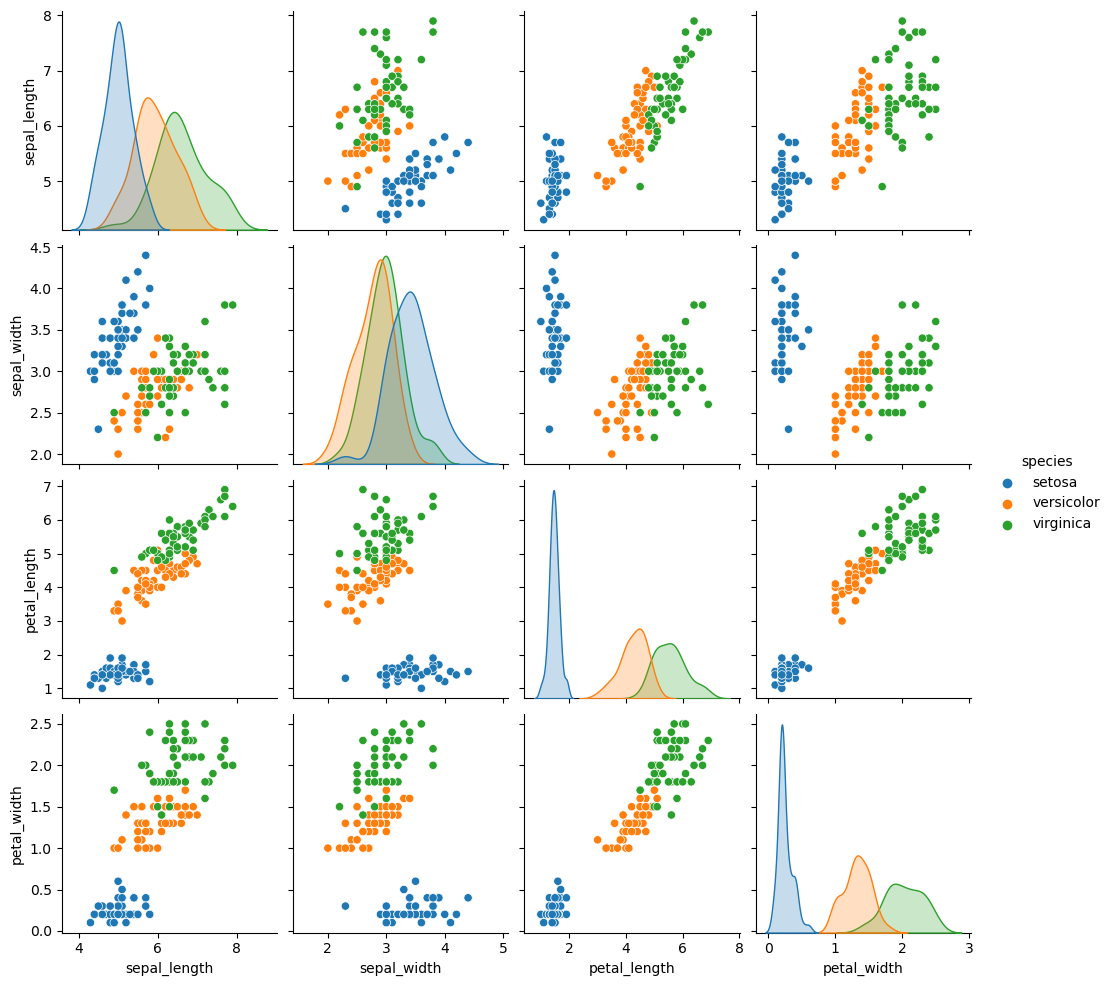

In [17]:
sns.pairplot(df,hue='species')

In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**as we know that machine learning model is not able to take text values as input so we need to convert or I can say we need to label our data in the form of numbers**

In [21]:
# number labeling on output values
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder_y = LabelEncoder()

In [23]:
y = encoder_y.fit_transform(y)

**Separating the dataset for training and testing**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**To make training faster and efficient we need to keep the scale of every feature same**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**We are building KNN model using sklearn**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
clf = KNeighborsClassifier(n_neighbors=6)

In [69]:
clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=6)

In [70]:
y_pred = clf.predict(X_test_scaled)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test,y_pred)

0.9777777777777777

**See the above accuracy if we increase the number of neighbors then our model will try to overfit. so going with 6 neighbors we are getting accurate results**